In [1681]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [1682]:
df = pd.read_csv('Dados_PRF_2022.csv', encoding = 'latin1', sep = ';')

In [1683]:
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405151,2022-01-01,sábado,01:35:00,PI,316.0,415,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,1,0,1,2,"-7,43280012","-40,68261908",SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,2022-01-01,sábado,02:40:00,PR,116.0,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,0,0,1,1,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,2022-01-01,sábado,05:22:00,MS,163.0,393,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,0,1,2,"-21,228445","-54,456296",SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,2022-01-01,sábado,07:00:00,RJ,101.0,457,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,...,1,1,0,1,2,"-23,03149804","-44,17715297",SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
4,405207,2022-01-01,sábado,09:00:00,MG,40.0,"508,3",RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,...,0,3,0,0,1,"-19,76061249","-44,1347544",SPRF-MG,DEL02-MG,UOP01-DEL02-MG


In [1684]:
df.shape

(64547, 30)

In [1685]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64547 entries, 0 to 64546
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      64547 non-null  int64  
 1   data_inversa            64547 non-null  object 
 2   dia_semana              64547 non-null  object 
 3   horario                 64547 non-null  object 
 4   uf                      64547 non-null  object 
 5   br                      64350 non-null  float64
 6   km                      64350 non-null  object 
 7   municipio               64547 non-null  object 
 8   causa_acidente          64547 non-null  object 
 9   tipo_acidente           64547 non-null  object 
 10  classificacao_acidente  64547 non-null  object 
 11  fase_dia                64547 non-null  object 
 12  sentido_via             64547 non-null  object 
 13  condicao_metereologica  64547 non-null  object 
 14  tipo_pista              64547 non-null

# Tratamento

In [1686]:
df.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        197
km                        197
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    3
delegacia                 759
uop                        48
dtype: int64

In [1687]:
df_nulos = df[df.isnull().any(axis=1)]
df_nulos.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
49,405687,2022-01-03,segunda-feira,11:30:00,RR,174.0,503,BOA VISTA,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,0,0,2,"2,794901","-60,698441",SPRF-RR,NaN,UOP01-DEL01-RR
207,407210,2022-01-07,sexta-feira,01:30:00,RR,174.0,318,CARACARAI,Reação tardia ou ineficiente do condutor,Colisão com objeto,...,1,1,0,1,1,"1,49675231","-60,94122833",SPRF-RR,NaN,UOP01-DEL01-RR
248,407393,2022-01-08,sábado,02:00:00,AP,210.0,2,MACAPA,Ingestão de álcool pelo condutor,Colisão com objeto,...,0,1,0,1,2,"0,08282017","-51,07776189",SPRF-AP,NaN,UOP01-DEL01-AP
474,408564,2022-01-14,sexta-feira,12:00:00,RR,174.0,504,BOA VISTA,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,3,0,1,2,"2,801374","-60,694801",SPRF-RR,NaN,UOP01-DEL01-RR
493,408663,2022-01-14,sexta-feira,20:30:00,BA,NaN,NaN,BARREIRAS,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,"-12,1376959","-44,921313",SPRF-BA,DEL10-BA,UOP01-DEL10-BA


In [1688]:
df['horario'] = pd.to_datetime(df['horario'])

C:\Users\Yago Schnorr\AppData\Local\Temp\ipykernel_2276\1165561740.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['horario'] = pd.to_datetime(df['horario'])


In [1689]:
df['hora'] = df['horario'].dt.hour

In [1690]:
df = df.dropna(subset=['uop', 'br', 'km'])

In [1691]:
df.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                          0
km                          0
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    0
delegacia                 734
uop                         0
hora                        0
dtype: int64

In [1692]:
vetor = df['uop'][0].split('-')

print(vetor)

'-'.join(vetor)[6:]

['UOP03', 'DEL04', 'PI']


'DEL04-PI'

In [1693]:
df['delegacia'] = df['delegacia'].fillna(df['uop'].apply(lambda x: '-'.join(x.split('-')[1:])))

In [1694]:
df.query('id == 405687')

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,hora
49,405687,2022-01-03,segunda-feira,2025-04-06 11:30:00,RR,174.0,503,BOA VISTA,Condutor deixou de manter distância do veículo...,Colisão traseira,...,2,0,0,2,"2,794901","-60,698441",SPRF-RR,DEL01-RR,UOP01-DEL01-RR,11


In [1695]:
df.isnull().sum().sum()

np.int64(0)

In [1696]:
df['dia_semana'].unique()

array(['sábado', 'domingo', 'segunda-feira', 'terça-feira',
       'quarta-feira', 'quinta-feira', 'sexta-feira'], dtype=object)

In [1697]:
norte = ['PA', 'AM', 'RR', 'RO', 'AC', 'AP', 'TO']
nordeste = ['MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']
centro_oeste = ['MT', 'MS', 'GO', 'DF']
sudeste = ['MG', 'ES', 'RJ', 'SP']
sul = ['PR', 'SC', 'RS']

In [1698]:
def definir_regiao(estado):
    if estado in norte:
        return 'Norte'
    elif estado in nordeste:
        return 'Nordeste'
    elif estado in centro_oeste:
        return 'Centro Oeste'
    elif estado in sudeste:
        return 'Sudeste'
    else:
        return 'Sul'

In [1699]:
df['regiao'] = df['uf'].apply(lambda x: definir_regiao(x))

## Testes

In [1700]:
df.query('regiao == "Norte"')['mortos'].value_counts()

mortos
0    3129
1     317
2      38
3       5
5       3
4       2
Name: count, dtype: int64

In [1701]:
df.query('regiao == "Norte"')['mortos'].sum()

np.int64(431)

In [1702]:
df_filtrado = df[(df['regiao'].isin(['Norte', 'Sul'])) & (df['mortos'] > 0)]

df_mortes = df_filtrado.groupby('regiao')['mortos'].sum().reset_index()

df_mortes

,regiao,mortos
0,Norte,431
1,Sul,1255


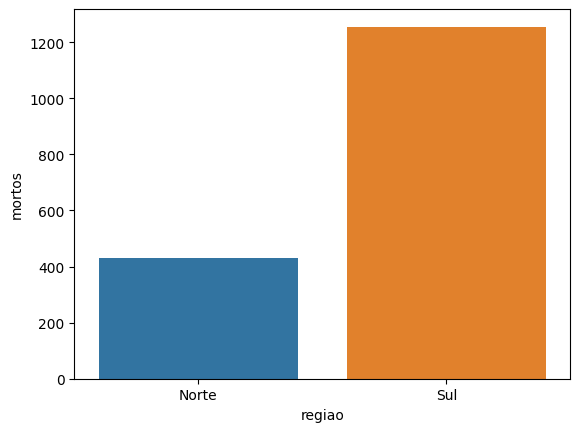

In [1703]:
sns.barplot(df_mortes,
            x='regiao',
            y='mortos',
            hue='regiao')
plt.show()

In [1704]:
df_mortes['mortos'].sum()

np.int64(1686)

In [1705]:
df_filtrado2 = df[(df['regiao']=='Norte') & (df['mortos'] > 0)]

df_mortes2 = df_filtrado2.groupby(['tipo_acidente', 'regiao'])['mortos'].value_counts().sort_values(ascending=False).reset_index()

df_mortes2

,tipo_acidente,regiao,mortos,count
0,Colisão frontal,Norte,1,86
1,Atropelamento de Pedestre,Norte,1,50
2,Saída de leito carroçável,Norte,1,45
3,Colisão traseira,Norte,1,38
4,Colisão transversal,Norte,1,32
5,Tombamento,Norte,1,24
6,Colisão frontal,Norte,2,21
7,Colisão lateral mesmo sentido,Norte,1,9
8,Colisão com objeto,Norte,1,9
9,Colisão traseira,Norte,2,8


In [1706]:
df_mortes2['mortos'].sum()

np.int64(57)

In [1707]:
total = 0

for i in range(0,26):
    total += df_mortes2['mortos'][i] * df_mortes2['count'][i]

total

np.int64(428)

In [1708]:
df_mortes2['mortos'] = [df_mortes2['mortos'][i] * df_mortes2['count'][i] for i in range(0,len(df_mortes2))]

df_mortes2

,tipo_acidente,regiao,mortos,count
0,Colisão frontal,Norte,86,86
1,Atropelamento de Pedestre,Norte,50,50
2,Saída de leito carroçável,Norte,45,45
3,Colisão traseira,Norte,38,38
4,Colisão transversal,Norte,32,32
5,Tombamento,Norte,24,24
6,Colisão frontal,Norte,42,21
7,Colisão lateral mesmo sentido,Norte,9,9
8,Colisão com objeto,Norte,9,9
9,Colisão traseira,Norte,16,8


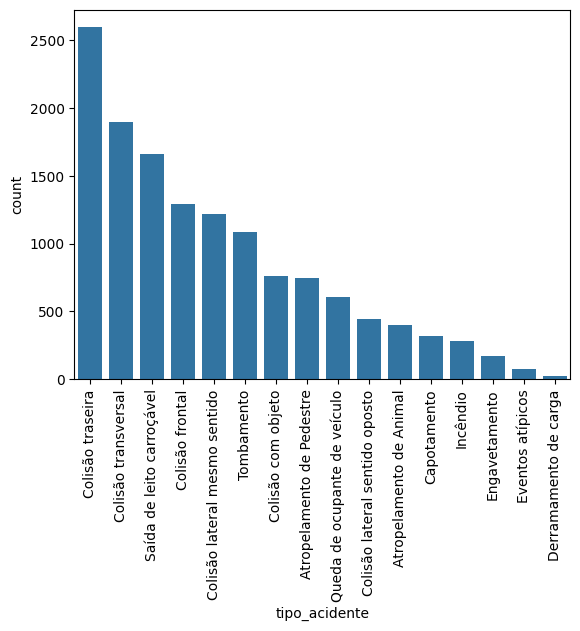

In [1709]:
nordeste = df[df['regiao'] == 'Nordeste']

sns.barplot(x=nordeste['tipo_acidente'].value_counts().index, y=nordeste['tipo_acidente'].value_counts())
plt.xticks(rotation=90)
plt.show()

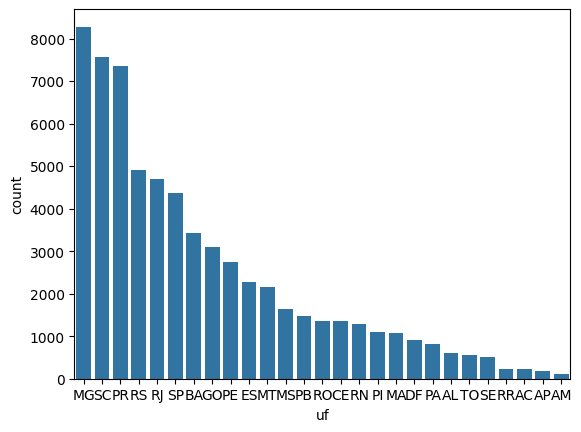

In [1710]:
sns.barplot(x=df['uf'].value_counts().index, y=df['uf'].value_counts())
plt.show()

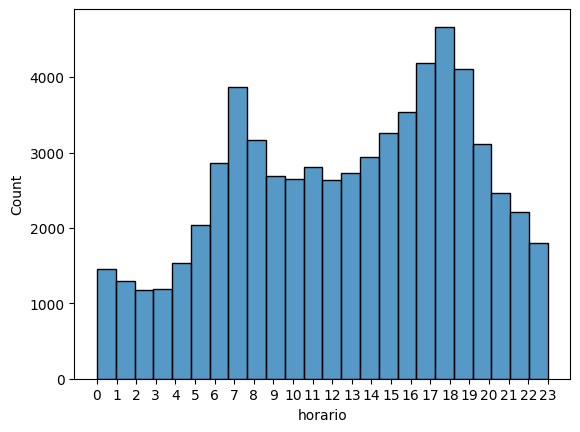

In [1711]:
fig, ax = plt.subplots()

plt.subplot()
sns.histplot(data=df, x=df['horario'].dt.hour, bins=24, kde=False, edgecolor='black')
ax.set_xticks(range(0, 24))
plt.show()

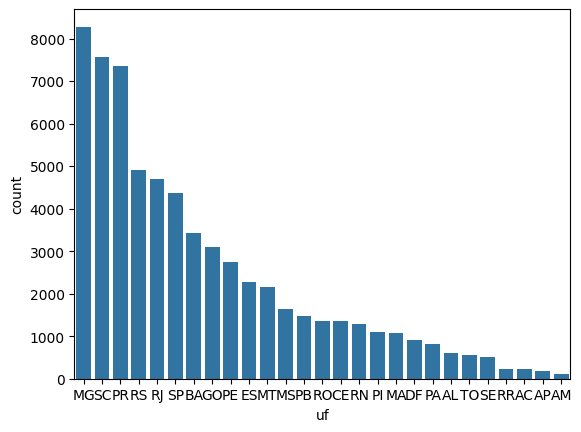

In [1712]:
sns.barplot(x=df['uf'].value_counts().index, y=df['uf'].value_counts())
plt.show()

In [1713]:
df_metereologico = df.groupby('condicao_metereologica').size().sort_values(ascending=False).reset_index(name='quantidade')
df_metereologico

,condicao_metereologica,quantidade
0,Céu Claro,39070
1,Nublado,10430
2,Chuva,7101
3,Sol,3771
4,Garoa/Chuvisco,2418
5,Ignorado,879
6,Nevoeiro/Neblina,555
7,Vento,121
8,Granizo,3
9,Neve,2


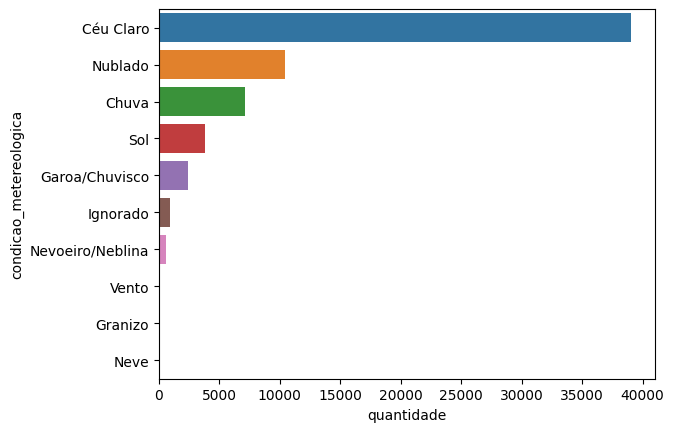

In [1714]:
sns.barplot(df_metereologico, y='condicao_metereologica', x='quantidade', hue='condicao_metereologica')
plt.show()

In [1715]:
df_filtrar = df[df['mortos'] > 0]

In [1716]:
df_metereologico_mortes = df_filtrar.groupby(['condicao_metereologica'])['mortos'].sum().sort_values(ascending=False).reset_index(name='quantidade')
df_metereologico_mortes

,condicao_metereologica,quantidade
0,Céu Claro,3397
1,Nublado,883
2,Chuva,532
3,Sol,237
4,Garoa/Chuvisco,199
5,Ignorado,107
6,Nevoeiro/Neblina,71
7,Vento,9


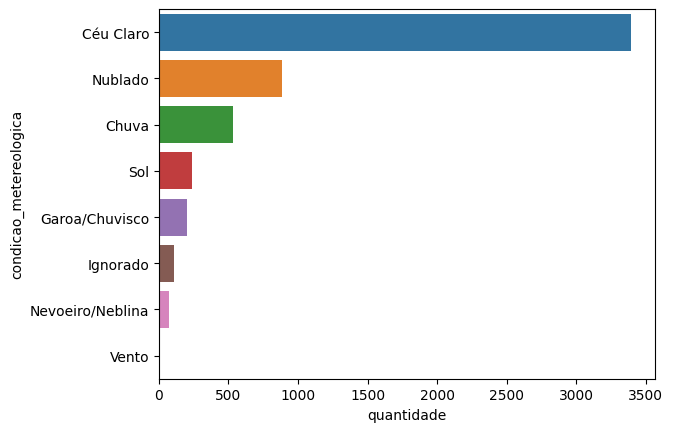

In [1717]:
sns.barplot(df_metereologico_mortes, y='condicao_metereologica', x='quantidade', hue='condicao_metereologica')
plt.show()

In [1718]:
acidente_pessoa = df.groupby(['feridos_graves','ilesos','feridos_leves','ignorados'])['tipo_acidente'].value_counts()
acidente_pessoa

feridos_graves  ilesos  feridos_leves  ignorados  tipo_acidente               
0               0       0              0          Saída de leito carroçável       314
                                                  Colisão com objeto              111
                                                  Tombamento                       95
                                                  Atropelamento de Animal          39
                                                  Queda de ocupante de veículo     27
                                                                                 ... 
11              1       33             0          Saída de leito carroçável         1
                16      1              0          Capotamento                       1
14              0       3              0          Atropelamento de Pedestre         1
15              12      20             0          Saída de leito carroçável         1
31              6       23             11         Tombamento 

## 1 Gráfico

In [1719]:
df_regioes = df[df['regiao'].isin(df['regiao'].unique())]

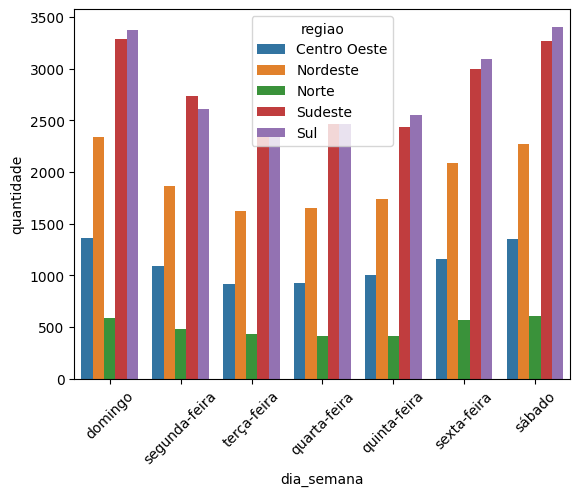

In [1720]:
df_regiao_dia_semana = df_regioes.groupby(['dia_semana', 'regiao']).size().reset_index(name='quantidade')

semana = ['domingo', 'segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado']

fig, ax = plt.subplots()

plt.subplot()
sns.barplot(df_regiao_dia_semana,
            x='dia_semana',
            y='quantidade',
            hue='regiao',
            order=semana)
plt.xticks(rotation=45)
plt.show()

## 2 Gráfico

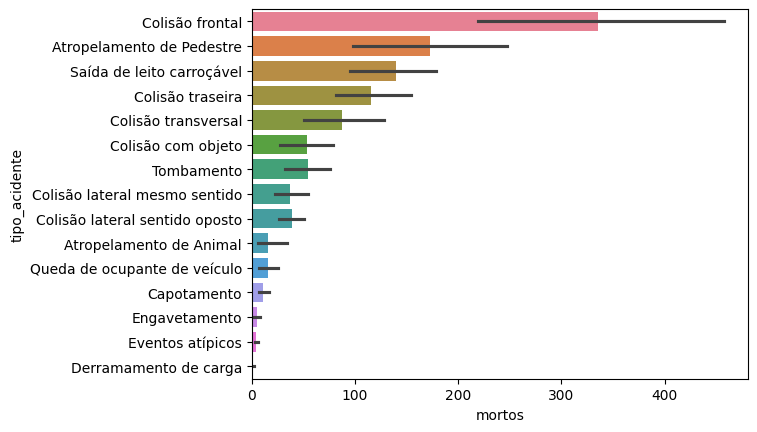

In [1721]:
filtro = df[(df['regiao'].isin(df['regiao'].unique())) & (df['mortos'] > 0)]

df_mortes = filtro.groupby(['tipo_acidente', 'regiao'])['mortos'].value_counts().sort_values(ascending=False).reset_index()

df_mortes['mortos'] = [df_mortes['mortos'][i] * df_mortes['count'][i] for i in range(0,len(df_mortes))]

df_mortes = df_mortes.groupby(['tipo_acidente', 'regiao'])['mortos'].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots()

plt.subplot()
sns.barplot(df_mortes,
            x='mortos',
            y='tipo_acidente',
            hue='tipo_acidente')

plt.show()

## 3 Gráfico

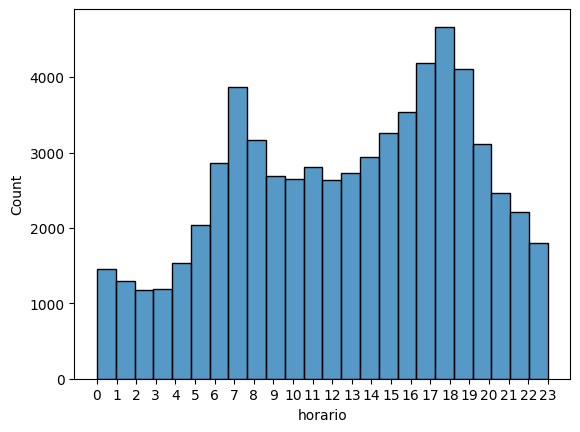

In [1722]:
df_regiao = df[df['regiao'] == 'Sudeste']

df_filtrado = df_regiao.groupby(['hora', 'regiao']).value_counts().reset_index(name='quantidade')

fig, ax = plt.subplots()

plt.subplot()
sns.histplot(data=df_filtrado, x=df['horario'].dt.hour, bins=24, kde=False, edgecolor='black')
ax.set_xticks(range(0, 24))
plt.show()

## 4 Gráfico

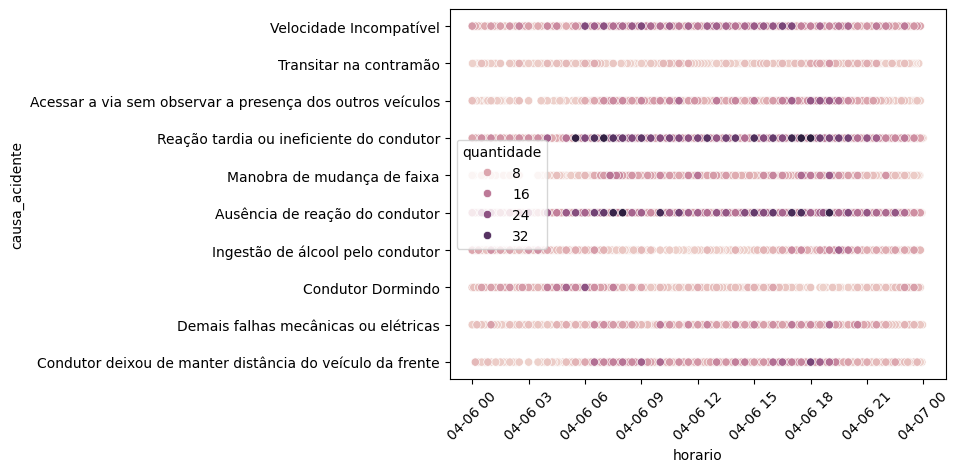

In [1723]:
top_acidentes = df_regioes['causa_acidente'].value_counts().nlargest(10).index

df_filtrado_top = df_filtrado[df_filtrado['causa_acidente'].isin(top_acidentes)]

df_causa_horario = df_filtrado_top.groupby(['causa_acidente', 'regiao'])['horario'].value_counts().sort_values(ascending=True).reset_index(name='quantidade')

fig, ax = plt.subplots()

plt.subplot()
sns.scatterplot(df_causa_horario,
                x='horario',
                y='causa_acidente',
                hue='quantidade')

plt.xticks(rotation=45)
plt.show()

## 5 Gráfico

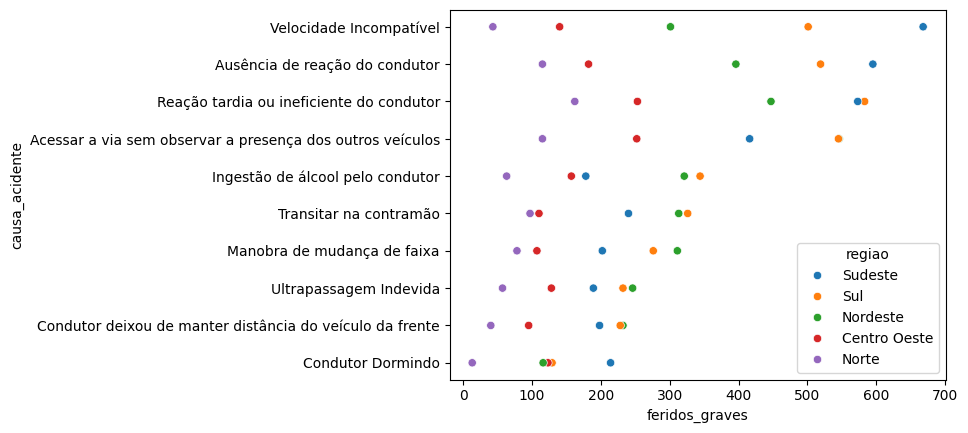

In [1724]:
df_filtrado = df[(df['regiao'].isin(df['regiao'].unique())) & (df['feridos_graves'] > 0)]

top_acidentes = df_filtrado['causa_acidente'].value_counts().nlargest(10).index

df_filtrado_top = df_filtrado[df_filtrado['causa_acidente'].isin(top_acidentes)]

df_feridos = df_filtrado_top.groupby(['causa_acidente', 'regiao'])['feridos_graves'].value_counts().sort_values(ascending=False).reset_index()

df_feridos['feridos_graves'] = [df_feridos['feridos_graves'][i] * df_feridos['count'][i] for i in range(0, len(df_feridos))]

df_feridos = df_feridos.groupby(['causa_acidente', 'regiao'])['feridos_graves'].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots()

plt.subplot()
sns.scatterplot(df_feridos,
                x='feridos_graves',
                y='causa_acidente',
                hue='regiao')

plt.show()

## 6 Gráfico

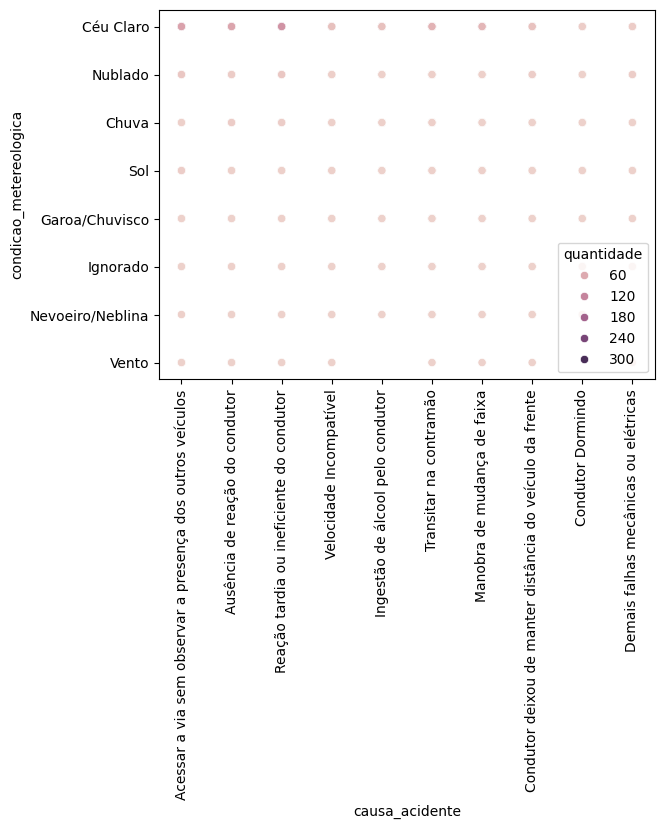

In [1725]:
top_acidentes = df_regioes['causa_acidente'].value_counts().nlargest(10).index

df_filtrado_top = df_filtrado[df_filtrado['causa_acidente'].isin(top_acidentes)]

df_causa_condicao = df_filtrado_top.groupby(['causa_acidente', 'regiao'])['condicao_metereologica'].value_counts().sort_values(ascending=False).reset_index(name='quantidade')

fig, ax = plt.subplots()

plt.subplot()
sns.scatterplot(df_causa_condicao,
                x='causa_acidente',
                y='condicao_metereologica',
                hue='quantidade')
plt.xticks(rotation=90)
plt.show()

## 7 Gráfico

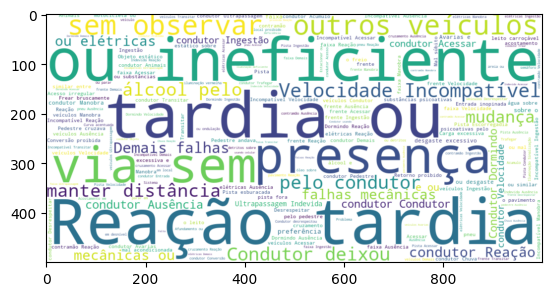

In [1726]:
excluir = ['de','na','dos','da']
stopwords = STOPWORDS.union(excluir)
palavras_nuvem = " ".join(df['causa_acidente'])  
nuvem = WordCloud(width=1000, height=500, background_color='white', stopwords=stopwords).generate(palavras_nuvem)

fig, ax = plt.subplots()

ax.imshow(nuvem, interpolation='bilinear')
plt.show()